In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Image Histogram
    1. bins : 히스토그램 그래프의 X축에서 표현되는 막대의 갯수. (간격 조절)
    2. dims : 이미지에서 조사하는 값을 의미. (차원, dimension)
    3. range : 측정하고자 하는 값의 범위

    우리는 이미 Threshold를 공부할 때 이미지 히스토그램에 대해서 살펴본 적이 있다. Image Histogram은 이미지 밝기의 분포를 그래프로 표현한 방식으로, Histogram을 이용하여 이미지 전체의 밝기 분포와 채도를 알 수 있다. 이미지 히스토그램으로 나타내어진 그래프의 X축은 색의 강도(0~255), Y축은 X축에 해당하는 색의 갯수를 의미한다. 아래 코드는 밝은 분위기의 이미지와 어두운 분위기의 이미지를 각각 히스토그램으로 나타낸 것이다. 밝은 이미지는 픽셀들의 색이 오른쪽에 치우쳐있고, 어두운 이미지는 픽셀들의 색이 왼쪽에 치우쳐져 있음을 알 수 있다. openCV에는 히스토그램을 분석할 수 있는 calcHist함수가 있다.
    
## cv2.calcHist(images, channels, mask, histSize, ranges [, hist [, accumulate]]) → hist
    이 함수는 하나 혹은 그 이상의 배열들에서 히스토그램을 계산하여 numpy 배열로 반환하는 함수이다.
    1. images : CV_8U, CV_16U, CV_32F 타입의 이미지를 인자로 받는다. 이미지의 채널 수는 상관 없다. 다만 이미지를 직접적으로 입력하고 싶으면 [] 연산자를 통해 이미지를 리스트화 해야 한다.
    2. channels : 히스토그램을 계산하는데 사용될 채널 리스트. Grayscale Image의 경우 [0]을, 컬러 이미지의 경우 B, G, R 순서대로 [0], [1], [2]를 인자로 입력하면 된다.
    3. mask : 이미지 전체에 대한 히스토그램을 구하고 싶으면 None, 이미지 특정 영역에 대한 히스토그램을 구하고 싶으면 해당 영역을 나타내는 image와 같은 크기를 가지면서 8bit 배열로 이루어진 Mask 값을 입력하면 된다. mask에서 0이 아닌 부분의 픽셀을 인식한다.
    4. histSize : bins 값을 의미한다. 0~255의 값을 가지므로 주로 [256]을 인자로 입력한다.
    5. ranges : range 값으로 측정하고자 하는 픽셀값의 범위를 나타낸다. 주로 [0, 256]을 인자로 입력한다.
    6. accumulate : 이 값이 설정되어 있으면 히스토그램을 계속해서 누적한다. 여러 배열에서 단일 히스토그램을 계산하거나 히스토그램을 적시에 업데이트 할 때 이 기능을 사용할 수 있다.

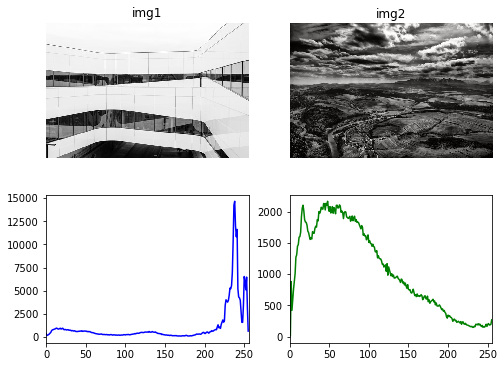

In [2]:
img1 = cv2.imread('jonas-aberg-DmgwxkcdFCM-unsplash.jpg')
img2 = cv2.imread('janusz-maniak-eP-LmfMwxpc-unsplash.jpg')

hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('img1')
plt.imshow(img1)
plt.axis('off')

plt.subplot(222)
plt.title('img2')
plt.imshow(img2)
plt.axis('off')

plt.subplot(223)
plt.plot(hist1, color="b")
plt.xlim([0, 256])

plt.subplot(224)
plt.plot(hist2, color="g")
plt.xlim([0, 256])
plt.show()

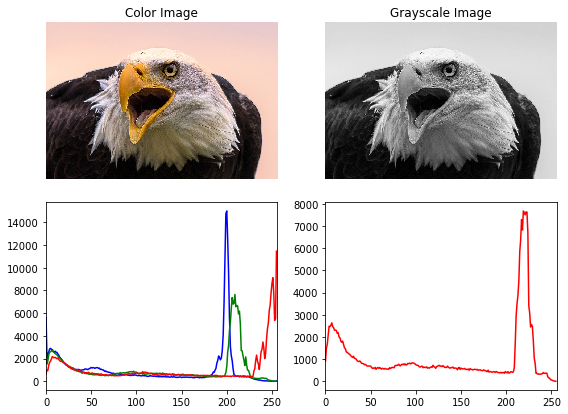

In [8]:
img3 = cv2.imread('bald-eagle-5463386_640.jpg')
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('Color Image')
plt.imshow(img3_rgb)
plt.axis('off')

plt.subplot(222)
plt.title('Grayscale Image')
plt.imshow(img3_gray, cmap="gray")
plt.axis('off')

plt.subplot(223)
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img3], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.xlim([0, 256])

hist_gray = cv2.calcHist([img3_gray], [0], None, [256], [0, 256])
plt.subplot(224)
plt.plot(hist_gray, color="r")
plt.xlim([0, 256])

plt.tight_layout()
plt.show()

# Masked Image Histogram

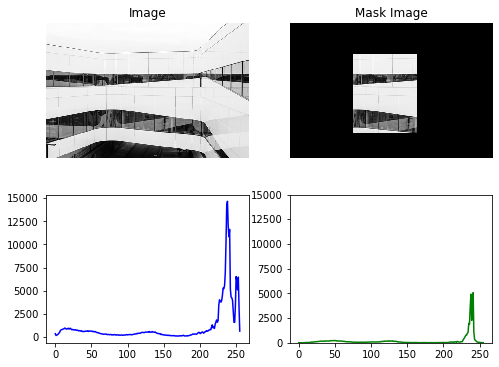

In [4]:
img = cv2.imread('jonas-aberg-DmgwxkcdFCM-unsplash.jpg')
mask = np.full(img.shape[:2], 0, dtype=np.uint8)
mask[100:350, 200:400] = 255

dst = cv2.bitwise_and(img, img, mask = mask)
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist_mask = cv2.calcHist([img], [0], mask, [256], [0, 256])

plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1)
plt.title('Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Mask Image')
plt.imshow(dst)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist, color="b")

plt.subplot(2, 2, 4)
plt.plot(hist_mask, color="g")
plt.ylim([0, 15000])
plt.show()

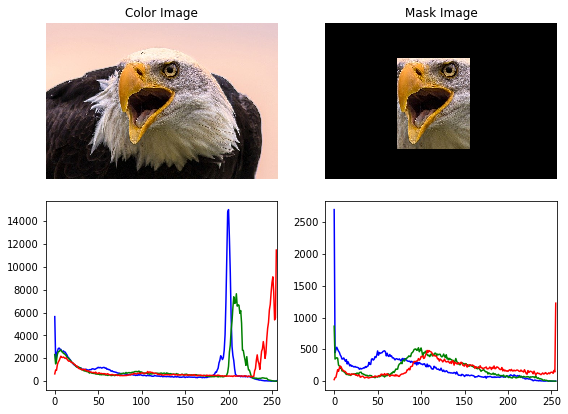

In [5]:
img3 = cv2.imread('bald-eagle-5463386_640.jpg')
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img3_gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

mask = np.zeros(img3.shape[:2], dtype=np.uint8)
mask[100:350, 200:400] = 255
masked_img = cv2.bitwise_and(img3, img3, mask=mask)
masked_img_rgb = cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.title('Color Image')
plt.imshow(img3_rgb)
plt.axis('off')

plt.subplot(222)
plt.title('Mask Image')
plt.imshow(masked_img_rgb)
plt.axis('off')

plt.subplot(223)
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([img3], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.xlim([-10, 256])

plt.subplot(224)
for i, col in enumerate(color):
    hist = cv2.calcHist([img3], [i], mask, [256], [0, 256])
    plt.plot(hist, color=col)
plt.xlim([-10, 256])

plt.tight_layout()
plt.show()

---
## Numpy와 Matplotlib 이용하기
    openCV의 calcHist 함수를 이용하는 것 이외에도 Numpy, Matplotlib를 이용하여 이미지 히스토그램을 찾을 수도 있다.

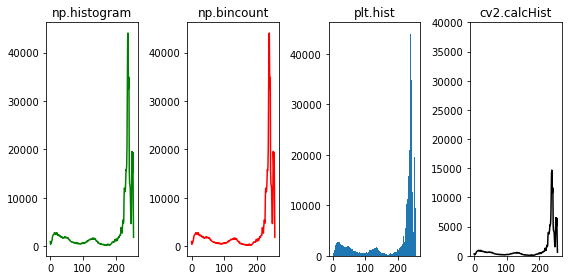

In [11]:
img = cv2.imread('jonas-aberg-DmgwxkcdFCM-unsplash.jpg')
plt.figure(figsize=(8, 4))

# numpy의 histogram 함수 이용하기
hist_np, bins = np.histogram(np.ravel(img), 256, [0, 256])
plt.subplot(141)
plt.title("np.histogram")
plt.plot(hist_np, color="g")

# numpy의 bincount 함수 이용하기
hist_bin = np.bincount(np.ravel(img), minlength=256)
plt.subplot(142)
plt.title("np.bincount")
plt.plot(hist_bin, color="r")

# matplotlib histogram 이용하기
plt.subplot(143)
plt.title("plt.hist")
plt.hist(img.ravel(), 256, [0, 256])

# openCV calcHist 함수 이용하기
plt.subplot(144)
plt.title("cv2.calcHist")
plt.plot(hist1, color="black")
plt.ylim([0, 40000])

plt.tight_layout()
plt.show()

    openCV의 calcHist와 비슷한 기능을 가진 numpy 함수는 histogram 함수이다. 이 함수는 이미지에서 구한 histogram과 BIN 갯수를 리턴한다. 이미지 픽셀값의 범위는 0~255로 음수값이 존재하지 않기 때문에 양수인 정수 값을 세는 numpy의 bincount 함수 또한 같이 사용할 수 있다. 특히 Grayscale 이미지의 경우에는 bincount 함수를 이용해 히스토그램을 구하면 numpy의 histogram 함수에 비해 10배 빠른 속도로 결과를 내준다. (하지만 가장 성능이 좋은 함수는 openCV에서 제공하는 calcHist 함수이므로 이미지 히스토그램을 구하려면 calcHist 함수를 이용하는 것이 더 좋다.)